# JupyLabBook @ SIRIUS

In [1]:
import CustomFunctions as CF
import FrontendFunctions as FF
import PyNexus as PN

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


from IPython.display import set_matplotlib_formats
if 'is_HR' in locals():
    # Used to generate a high-resolution PDF
    set_matplotlib_formats('png', 'pdf')
    
class Experiment:
    """
    Class Experiment is used to pass arguments concerning the current experiment only.
    """
    def __init__(self):
        pass
    
expt = Experiment() 

# Necessary for saving in pdf
expt.notebook_name = 'Example.ipynb'

# Directory where the data will be saved
expt.working_dir = "/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/working/"

# Directory where the nexus files are 
expt.recording_dir = "/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/recording/"

# Directory where the logs are
expt.logs_dir = "/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/logs/"   

# Plot/save parameters
expt.moytocreate=(10, 20, 40)
expt.binsize=10
expt.nblevels=50
expt.cmap = 'viridis'

#######################
"""
General parameters for data reduction
Comment/uncomment depending on the types of experiment

Mandatory for GIXD: 
wavelength, thetac, thetai
Can be determined by a widget:
channel0, thetazfactor

Mandatory for GIXS: 
wavelength, thetai, distance, pixel_PONI_x, pixel_PONI_y

Mandatory for XRF:
first_channel, last_channel, list_elems
"""

# Wavelength in nm
expt.wavelength = 0.155

# Critical angle in rad
expt.thetac = 0.0027

######################################
FF.Check_files(expt)

Versions of modules used:
CustomFunctions: 0.5
FrontendFunctions: 0.5
PyNexus: v4.1
Check that you are using the last versions of the modules and read the manual on: 
https://github.com/ArnaudHemmerle/JupyLabBook



In [2]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
FF.Create_form()

Text(value='', description='Experiment title:', layout=Layout(height='40px', width='800px'), placeholder='Titl…

----------------------------------------------------------------------------------------------------


Text(value='', description='Users (on site):', layout=Layout(height='40px', width='800px'), placeholder='Names…

----------------------------------------------------------------------------------------------------


Text(value='', description='Recording directory:', layout=Layout(height='40px', width='800px'), placeholder='F…

Machine:


Optics:


Beam:


Monitors and XBPM:


Textarea(value='', description='Detectors:', layout=Layout(height='40px', width='800px'), placeholder='Type of…

Remarks:


Textarea(value='', description='Remarks:', layout=Layout(height='40px', width='800px'), placeholder='Remarks',…

Button(description='Print form', style=ButtonStyle())

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Form

$\LARGE \textbf{SIRIUS Beamline}:\textbf{Experiment 1234}$

$\Large \color{red}{\bf Confined\ at\ home}$

* Type: Proposal
* Safety: Red
* Date: 13/03/2020 - 11/05/2020

* Main proposer: Hemmerle
* Local contact: Arnaud
* Users (on site): Person A; Person B
* Recording directory: Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/recording/

* Machine:
	 * Current: 450 mA
	 * Mode: Top-up

* Optics:
	 * DCM: Si111
	 * MGM: Not used
	 * M1: M1-A Pt Track
	 * M2: M2 Pt Track
	 * M3: No M3
	 * M4: M4 Pt Track

* Beam:
	 * Fixed/Variable energy: Fixed
	 * Energy (keV): 8
	 * Wavelength (nm): 0.155
	 * Harmonic: 19
	 * Polarisation: LH
	 * Phase (deg): 0
	 * Horizontal focalisation: False
	 * Vertical focalisation: True
	 * Horizontal beamsize (mm): 2
	 * Vertical beamsize (mm): 0.1

* Monitors and XBPM:
	 * mon1: 
	 * mon2: thick diamond
	 * mon3: 
	 * mon4: 
	 * Detectors: Pilatus

* Remarks: This is a nice experiment.

# Beamline alignment

## Scan 654 -> 680 : DCM Alignment 8keV + HU36 + M1 + M2

-Incidence: $$\frac{786-558}{2 \times 2069} \times 0.0355 = 1.9mrad$$

In [9]:
# Incident angle in rad
expt.thetai = 0.0019 

## Alignment diffracto

In [10]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### (Vertical) SIRIUS_2020_03_11_0744: dscan basez -.2 .2 50 .1

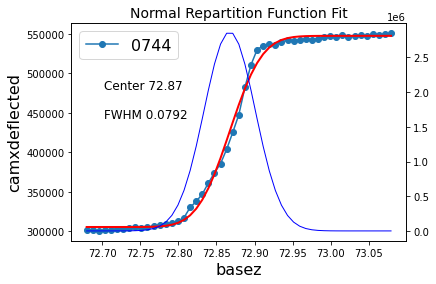

In [12]:
CF.GaussianRepartition_fit(nxs_filename='SIRIUS_2020_03_11_0744.nxs', recording_dir = expt.recording_dir,xLabel='basez', yLabel='camxdeflected')

In [13]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### (Horizontal) SIRIUS_2020_03_11_0749: %sigmoid_dscan basex -.5 .5 100 .1

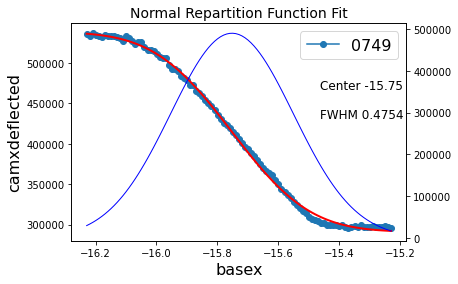

In [15]:
CF.GaussianRepartition_fit(nxs_filename='SIRIUS_2020_03_11_0749.nxs', recording_dir = expt.recording_dir,xLabel='basex', yLabel='camxdeflected')

In [16]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SIRIUS_2020_03_11_0752: continuous_ascan delta -.15 .15 100 1

scans 750 -> 752 : Alignment delta angle (Pilatus+Soller)

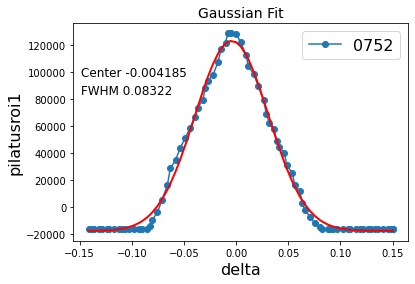

In [18]:
CF.Gaussian_fit(nxs_filename='SIRIUS_2020_03_11_0752.nxs', recording_dir = expt.recording_dir,xLabel='delta', yLabel='pilatusroi1')

In [19]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Calibration thetaz

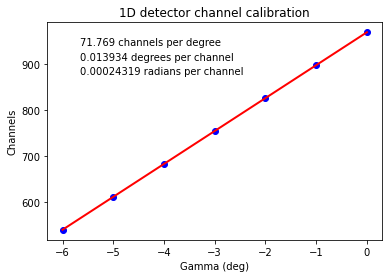

In [20]:
calib_thetaz_data=np.array([
# gamma  channel
[0,      970],
[-1,     899],
[-2,     827],
[-3,     755],
[-4,     683],
[-5,     611],
[-6,     539],
])
expt.thetazfactor=CF.Calib_thetaz(calib_thetaz_data)

In [21]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Calibration with Octadecanol

### SIRIUS_2020_03_12_0756: continuous_ascan delta -24 -19 100 5

Extraction of Vineyard

 - Open Nexus Data File :
	/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/recording/SIRIUS_2020_03_12_0756.nxs
	. Number of data points:  101
	. Available Counters:
		 0  ------->  delta
		 1  ------->  zs
		 2  ------->  gamma
		 3  ------->  hu36energy
		 4  ------->  xs
		 5  ------->  energydcm
		 6  ------->  current
		 7  ------->  mon2
		 8  ------->  surfacepressure
		 9  ------->  areapermolecule
		 10  ------->  qxy
		 11  ------->  pilatus
		 12  ------->  pilatusroi1
		 13  ------->  integration_time
		 14  ------->  sensorsRelTimestamps
		 15  ------->  sensorsTimestamps
	. Pilatus data found, (column 11, alias pilatus)
	. qxy data found, (column 10, alias qxy)
	. Surface pressure data found, mean value 19.74 ± 0.006119 mN/m
	. Area per molecule data found, mean value 0.3557 ± 3.944e-05 nm2 per molecule
	. Gamma motor data found, mean value -0.0004471 deg


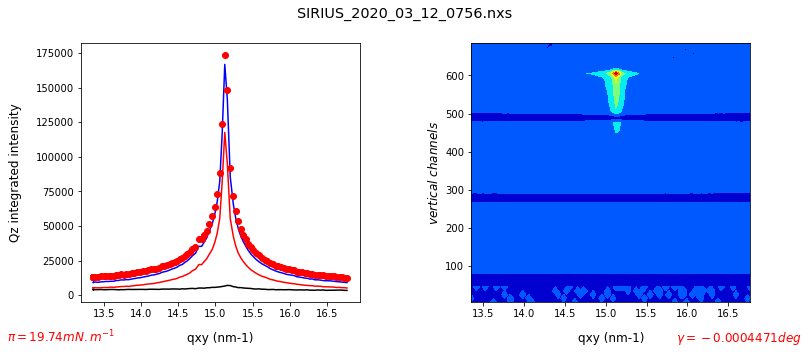

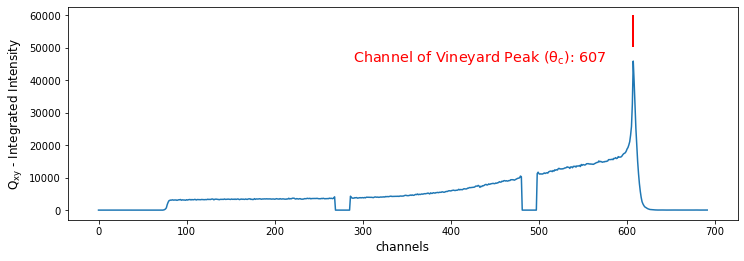

Data not saved. To save data, run a GIXD on the scan.
Channel0: 607


In [23]:
expt.channel0 = CF.Extract_channel_Qc(nxs_filename='SIRIUS_2020_03_12_0756.nxs',working_dir=expt.working_dir, recording_dir=expt.recording_dir, logx=False, logy=False, logz=False)

# Experiment GIXD+Langmuir

## Sample A

In [24]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SIRIUS_Isotherm_2019_02_17_01544: isotherm 1.97 46 35000 1

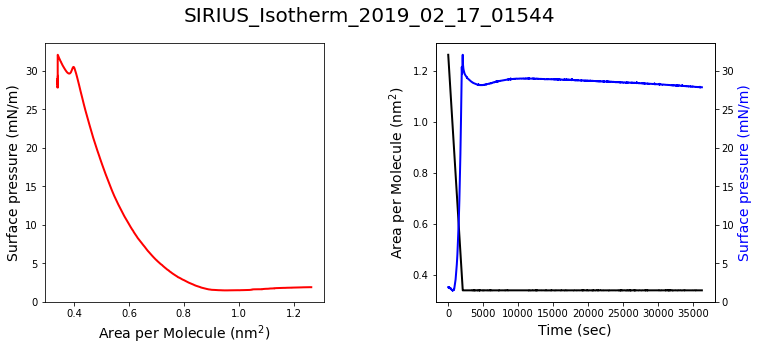

In [26]:
CF.Plot_isotherm(nxs_filename='SIRIUS_Isotherm_2019_02_17_01544.nxs', recording_dir=expt.recording_dir, show_data_stamps=False, verbose=False)

In [27]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SIRIUS_2020_03_12_0760: run cont_regh.ipy

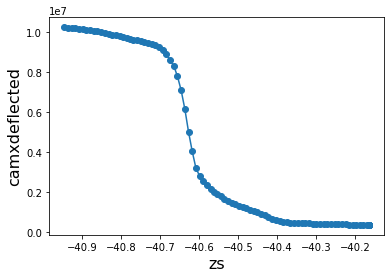

In [30]:
CF.Plot_1D(nxs_filename='SIRIUS_2020_03_12_0760.nxs', recording_dir=expt.recording_dir,xLabel='zs', yLabel='camxdeflected')

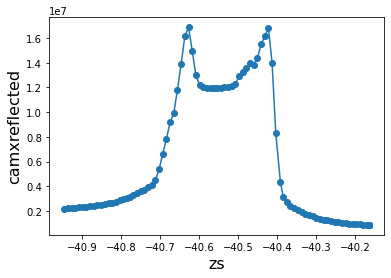

In [29]:
CF.Plot_1D(nxs_filename='SIRIUS_2020_03_12_0760.nxs', recording_dir=expt.recording_dir,xLabel='zs', yLabel='camxreflected')

In [31]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SIRIUS_2020_03_12_0759: continuous_ascan delta -24 -15 150 5

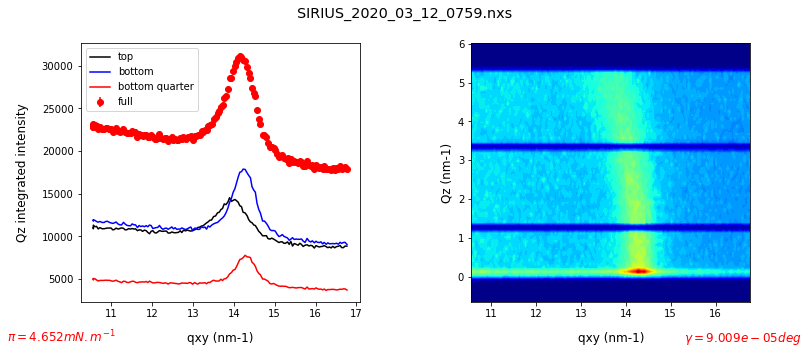

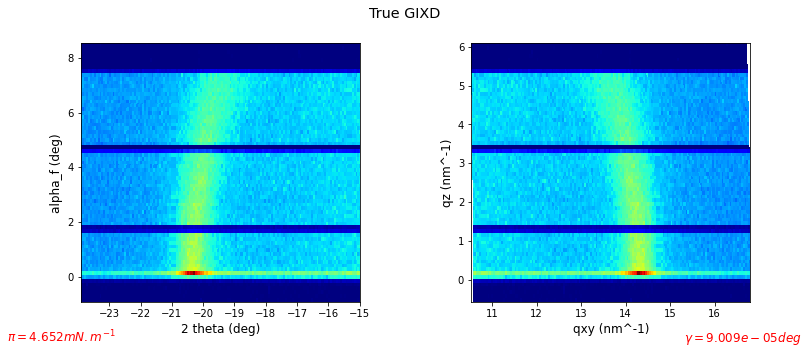

In [33]:
CF.Extract_GIXD(nxs_filename='SIRIUS_2020_03_12_0759.nxs',working_dir=expt.working_dir, recording_dir=expt.recording_dir, logx=False, logy=False, logz=False, channel0=expt.channel0, thetazfactor=expt.thetazfactor, wavelength=expt.wavelength, thetac=expt.thetac, thetai=expt.thetai, binsize=expt.binsize, computeqz=True, nblevels=expt.nblevels, moytocreate=expt.moytocreate, show_data_stamps=False, verbose=False, plot_true_GIXD=True)

In [34]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Sample B

### SIRIUS_2020_03_12_0756: continuous_ascan delta -24 -19 100 5

 - Open Nexus Data File :
	/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/recording/SIRIUS_2020_03_12_0756.nxs
	. Number of data points:  101
	. Available Counters:
		 0  ------->  delta
		 1  ------->  zs
		 2  ------->  gamma
		 3  ------->  hu36energy
		 4  ------->  xs
		 5  ------->  energydcm
		 6  ------->  current
		 7  ------->  mon2
		 8  ------->  surfacepressure
		 9  ------->  areapermolecule
		 10  ------->  qxy
		 11  ------->  pilatus
		 12  ------->  pilatusroi1
		 13  ------->  integration_time
		 14  ------->  sensorsRelTimestamps
		 15  ------->  sensorsTimestamps
	. Pilatus data found, (column 11, alias pilatus)
	. qxy data found, (column 10, alias qxy)
	. Valid data between points 0 and 100
	. Surface pressure data found, mean value 19.74 ± 0.006163 mN/m
	. Area per molecule data found, mean value 0.3557 ± 3.866e-05 nm2 per molecule
	. Gamma motor data found, mean value -0.0004715 deg
	. Original, non binned matrix saved in:                        

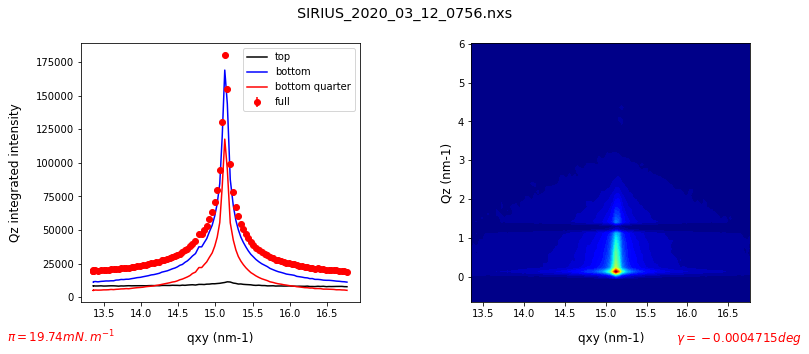

In [36]:
CF.Extract_GIXD(nxs_filename='SIRIUS_2020_03_12_0756.nxs',working_dir=expt.working_dir, recording_dir=expt.recording_dir, logx=False, logy=False, logz=False, channel0=expt.channel0, thetazfactor=expt.thetazfactor, wavelength=expt.wavelength, thetac=expt.thetac, thetai=expt.thetai, binsize=expt.binsize, computeqz=True, nblevels=expt.nblevels, moytocreate=expt.moytocreate, show_data_stamps=True, verbose=True, plot_true_GIXD=False)

# Experiment GIXS

In [37]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# Geometry of the experiment
expt.thetai = 0.18*3.14159/180.
expt.distance = 309.5
expt.pixel_PONI_x = 572
expt.pixel_PONI_y = 995
expt.wavelength = 12398./11000./10.
expt.cmap = "Greys"

### SIRIUS_2019_11_07_00325: tscan 10 1

 - Open Nexus Data File :
	/Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/recording/SIRIUS_2019_11_07_00325.nxs
	. Number of data points:  11
	. Available Counters:
		 0  ------->  hu36energy
		 1  ------->  current
		 2  ------->  mon2
		 3  ------->  mon4
		 4  ------->  camxdirect
		 5  ------->  pilatus
		 6  ------->  pilatusroi1
		 7  ------->  integration_time
		 8  ------->  sensorsRelTimestamps
		 9  ------->  sensorsTimestamps
	. Pilatus data found, (column 5, alias pilatus)


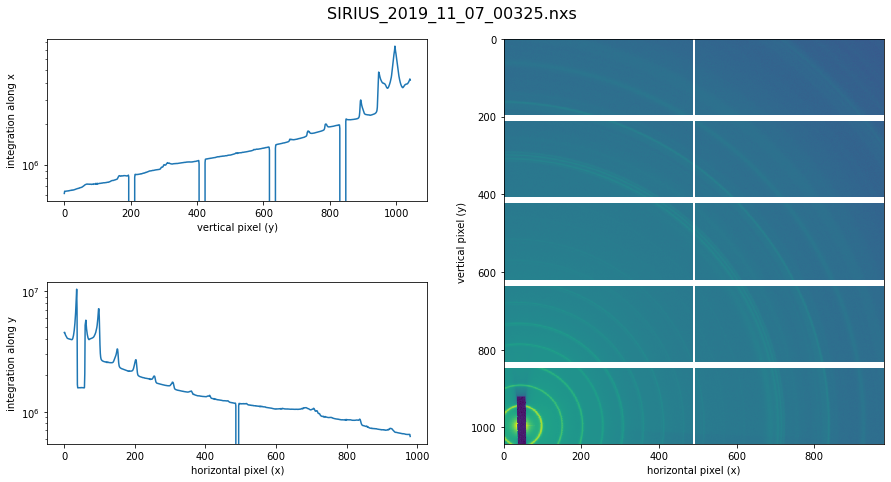

	. Original matrix saved in:
	 /Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/working/SIRIUS_2019_11_07_00325.mat
 
	. Tiff saved in:
	 /Users/arnaudhemmerle/Documents/Recherche/Analysis/JupyLabBook/working/SIRIUS_2019_11_07_00325.tiff
 


In [39]:
CF.Extract_pilatus_sum(nxs_filename='SIRIUS_2019_11_07_00325.nxs',working_dir=expt.working_dir, recording_dir=expt.recording_dir, logz=True, show_data_stamps=True, verbose=True, cmap=expt.cmap)

In [4]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SIRIUS_2020_01_30_0614: tscan 10 1

	. Available Counters:
		 0  ------->  delta
		 1  ------->  ys
		 2  ------->  shg
		 3  ------->  zs
		 4  ------->  alphax
		 5  ------->  gamma
		 6  ------->  xs
		 7  ------->  energydcm
		 8  ------->  alphay
		 9  ------->  mon2
		 10  ------->  qxy
		 11  ------->  mon4
		 12  ------->  pilatus
		 13  ------->  pilatusroi1
		 14  ------->  integration_time
		 15  ------->  sensorsRelTimestamps
		 16  ------->  sensorsTimestamps


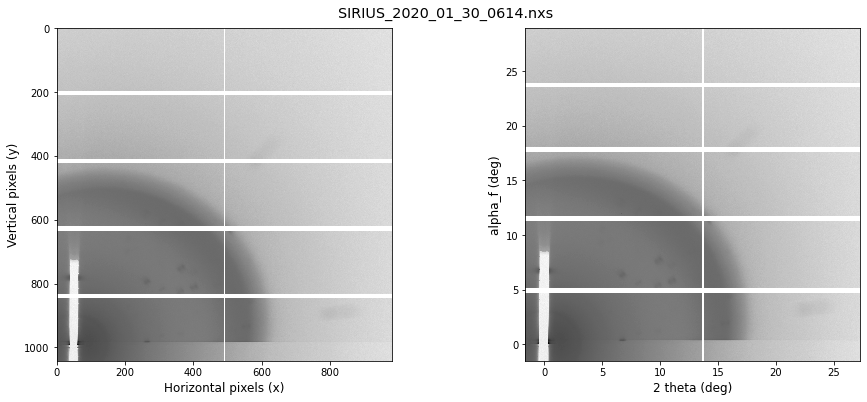

In [17]:
CF.Extract_GIXS(nxs_filename='SIRIUS_2020_01_30_0614.nxs',working_dir=expt.working_dir, recording_dir=expt.recording_dir, logz=True, wavelength=expt.wavelength, thetai=expt.thetai, distance=expt.distance, pixel_PONI_x=expt.pixel_PONI_x, pixel_PONI_y=expt.pixel_PONI_y, show_data_stamps=True, verbose=False ,cmap=expt.cmap, plot_twotheta_alphaf=True)

In [12]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SIRIUS_2020_01_30_0614: No command found

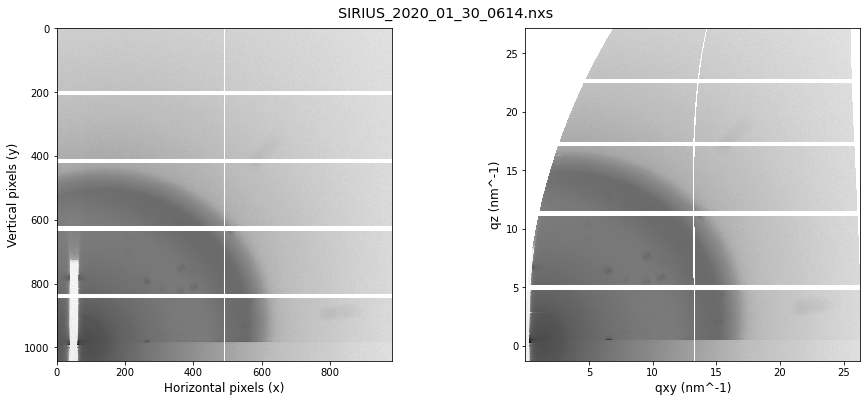

In [18]:
CF.Extract_GIXS(nxs_filename='SIRIUS_2020_01_30_0614.nxs',working_dir=expt.working_dir, recording_dir=expt.recording_dir, logz=True, wavelength=expt.wavelength, thetai=expt.thetai, distance=expt.distance, pixel_PONI_x=expt.pixel_PONI_x, pixel_PONI_y=expt.pixel_PONI_y,  show_data_stamps=False, verbose=False ,cmap=expt.cmap, plot_qxy_qz=True)

# Experiment XRF

In [30]:
# Parameters for XRF
expt.first_channel = 200
expt.last_channel = 1600
expt.list_elems = [0,1,2]

In [20]:
FF.Choose_action(expt)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### SIRIUS_2017_12_11_08042: run xsw7.ipy

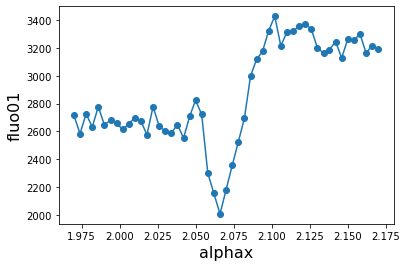

In [26]:
CF.Plot_1D(nxs_filename='SIRIUS_2017_12_11_08042.nxs', recording_dir=expt.recording_dir,xLabel='alphax', yLabel='fluo01')

	. Available Counters:
		 0  ------->  alphax
		 1  ------->  gamma
		 2  ------->  delta
		 3  ------->  ys
		 4  ------->  ds1hg
		 5  ------->  os2hg
		 6  ------->  zs
		 7  ------->  alphax
		 8  ------->  gamma
		 9  ------->  hu36energy
		 10  ------->  xs
		 11  ------->  thetah
		 12  ------->  ds2hg
		 13  ------->  ss1hg
		 14  ------->  current
		 15  ------->  mon2
		 16  ------->  dioderefl
		 17  ------->  fluo00
		 18  ------->  fluo01
		 19  ------->  fluo02
		 20  ------->  fluo03
		 21  ------->  fluoicr00
		 22  ------->  fluoicr01
		 23  ------->  fluoicr02
		 24  ------->  fluoicr03
		 25  ------->  fluoocr01
		 26  ------->  fluoocr02
		 27  ------->  fluoocr03
		 28  ------->  fluospectrum00
		 29  ------->  fluospectrum01
		 30  ------->  fluospectrum02
		 31  ------->  fluospectrum03
		 32  ------->  fluoocr00
		 33  ------->  mon4
		 34  ------->  gainfemtodioderefl
		 35  ------->  integration_time
		 36  ------->  sensors_rel_timestamps
		 37  ------->  sen

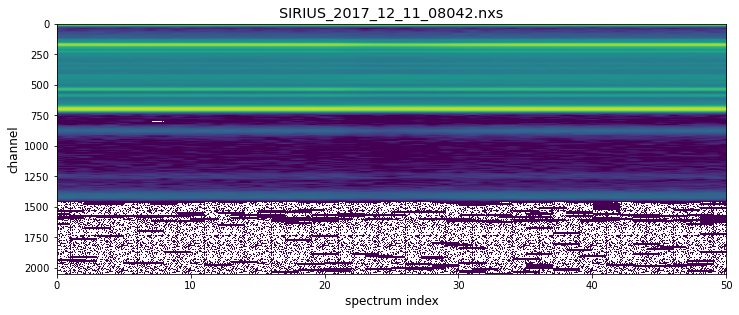

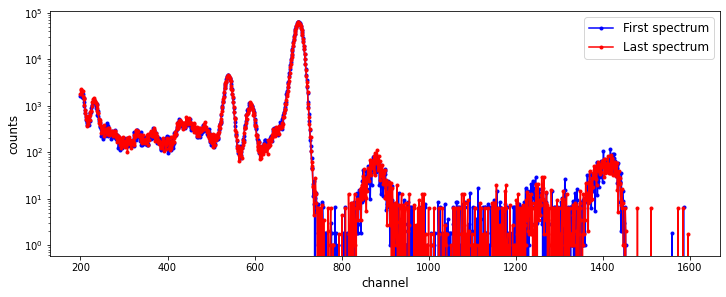

In [25]:
CF.Extract_fluo_sum(nxs_filename='SIRIUS_2017_12_11_08042.nxs',working_dir=expt.working_dir, recording_dir=expt.recording_dir, logz=True, list_elems=expt.list_elems, first_channel=expt.first_channel, last_channel=expt.last_channel, show_data_stamps=True, verbose=False)

In [ ]:
FF.Choose_action(expt)